## Assignment-08

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [1]:
# it‘s your time
import pandas as pd
csv_name = './sqlResult_1558435.csv'
init_content = pd.read_csv(csv_name, encoding='gb18030')

In [2]:
init_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [3]:
# it's your time
flag_list = []
for source in init_content.source:
    if source == '新华社':
        flag_list.append(1)
    else:
        flag_list.append(0)
new_content = pd.DataFrame(zip(init_content.content, flag_list), columns=['content', 'flag'])
new_content = new_content.dropna(subset=['flag', 'content'])
new_content.shape[0]

87054

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [4]:
import jieba,re
reg = re.compile('\w+')
cuts = []
contents = pd.Series(new_content['content']).astype(str)
for (i,content) in enumerate(contents):
    sentences = []
    if (i % 5000 == 0):
        print(i)
    sentences += reg.findall(content)
    cut = []
    for s in sentences:
        cut += jieba.cut(s)
    cuts.append(' '.join(cut))

Building prefix dict from the default dictionary ...


0


Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.950 seconds.
Prefix dict has been built succesfully.


5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=300)
X = vectorizer.fit_transform(cuts)

In [7]:
X.shape[0]

87054

### Step4: 参考scikit-learning的方法，构建你的机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

+ 参照scikit learning的示例，从构建你的第一个SVM机器学习模型。

#### 训练集，验证集，测试集
训练集用来训练模型
验证集用来调参
测试集用来测试模型

In [8]:
from sklearn.model_selection import train_test_split
y = pd.Series(new_content['flag']).astype(int)
X_train, X_two, y_train, y_two = train_test_split(X, y, test_size=0.33, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_two, y_two, test_size=0.5, random_state=42)

In [9]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_train_predict = clf.predict(X_train)
y_valid_predict = clf.predict(X_valid)
y_test_predict = clf.predict(X_test)

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

#### Precision又叫查准率，Recall又叫查全率。这两个指标共同衡量才能评价模型输出结果。
TP: 预测为1(Positive)，实际也为1(Truth-预测对了)
TN: 预测为0(Negative)，实际也为0(Truth-预测对了)
FP: 预测为1(Positive)，实际为0(False-预测错了)
FN: 预测为0(Negative)，实际为1(False-预测错了)
总的样本个数为：TP+TN+FP+FN。
#### Accuracy/Precision/Recall的定义
Accuracy = (预测正确的样本数)/(总样本数)=(TP+TN)/(TP+TN+FP+FN)

Precision = (预测为1且正确预测的样本数)/(所有预测为1的样本数) = TP/(TP+FP)

Recall = (预测为1且正确预测的样本数)/(所有真实情况为1的样本数) = TP/(TP+FN)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [110]:
# it's your time
def calcul_coef(X, y, y_predict):
    acc = sum(y_predict == y) / len(y)
    tp = tn = fp = fn = 0
    for (y_pre, y_real) in zip(y_predict, y):
        if y_pre == 1 and y_real == 1:
            tp += 1
        if y_pre == 0 and y_real == 0:
            tn += 1
        if y_pre == 0 and y_real == 0:
            fp += 1
        if y_pre == 0 and y_real == 1:
            fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)    
    f1 = 2 * (precision * recall) / (precision + recall) 
    return (acc, precision, recall, f1)

In [16]:
print('train data: {}'.format(calcul_coef(X_train, y_train, y_train_predict)))
print('valid data: {}'.format(calcul_coef(X_valid, y_valid, y_valid_predict)))
print('test data: {}'.format(calcul_coef(X_test, y_test, y_test_predict)))

train data: (0.9911017385042691, 0.9092151469545211, 0.9977409924446639, 0.9514232701271665)
valid data: (0.9768866610971874, 0.9228905359179019, 0.992109093694936, 0.9562488462248477)
test data: (0.974380395433027, 0.9164761360388682, 0.9920340293890177, 0.9527594146921191)


### Step6: 使用 test_data 对其进行新数据的判断

In [18]:
# it's your time
acc_test, precision_test, recall_test, f1_test = calcul_coef(X_test, y_test, y_test_predict)
print('acc_test:', acc_test)
print('precision_test:', precision_test)
print('recall_test:', recall_test)
print('f1_test:', f1_test)

acc_test: 0.974380395433027
precision_test: 0.9164761360388682
recall_test: 0.9920340293890177
f1_test: 0.9527594146921191


### Step7: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [19]:
y_predict = clf.predict(X)

In [20]:
new_content['pred'] = y_predict
new_content.head()

,content,flag,pred
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0,0


In [21]:
copy_news = new_content[(new_content.flag == 0) & (new_content.pred == 1)]
copy_news.head()

,content,flag,pred
51,戈壁的大漠黄沙曾掩埋了无数西域古道，而如今一条大漠天路正顽强地与黄沙“搏斗”，在乌兰布和、腾...,0,1
63,2017年上海国际电影电视节，包括6月12日至16日举办的第二十三届上海电视节和6月17日至...,0,1
70,发现???共享单车“花式载人”??挡泥板当“后座”\r\n如今，共享单车种类繁多，有的共享单...,0,1
111,点击图片进入下一页\r\n中新网广州6月23日电 (记者 郭军)6月23日，天合国际融资租赁...,0,1
123,中新社海口6月23日电 题：观澜湖“掌门人”朱鼎健谈港企发展：要更国际 也要更中国\r\n中...,0,1


In [27]:
len(copy_news)

894

#### svm计算时间偏长，但准确率很高

### Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf_gnb = gnb.fit(X_train.toarray(), y_train)

In [26]:
y_train_predict_gnb = clf_gnb.predict(X_train.toarray())
y_valid_predict_gnb = clf_gnb.predict(X_valid.toarray())
y_test_predict_gnb = clf_gnb.predict(X_test.toarray())

In [28]:
print('gnb train data: {}'.format(calcul_coef(X_train, y_train, y_train_predict_gnb)))
print('gnb valid data: {}'.format(calcul_coef(X_valid, y_valid, y_valid_predict_gnb)))
print('gnb test data: {}'.format(calcul_coef(X_test, y_test, y_test_predict_gnb)))

gnb train data: (0.7738401399033021, 0.8816439570178354, 0.7554007365503626, 0.8136546266856143)
gnb valid data: (0.776176552492342, 0.8884204861422549, 0.7588293878801808, 0.8185273944302124)
gnb test data: (0.7769423558897243, 0.8795698924731182, 0.7591647331786543, 0.8149439601494396)


In [30]:
acc_test_gnb, precision_test_gnb, recall_test_gnb, f1_test_gnb = calcul_coef(X_test, y_test, y_test_predict_gnb)
print('acc_test:', acc_test_gnb)
print('precision_test:', precision_test_gnb)
print('recall_test:', recall_test_gnb)
print('f1_test:', f1_test_gnb)

acc_test: 0.7769423558897243
precision_test: 0.8795698924731182
recall_test: 0.7591647331786543
f1_test: 0.8149439601494396


#### naive bayes训练的准确率不高，但是很快，可能需要调整模型参数

In [42]:
coef_arr = []
for (i, v) in enumerate(range(100,1100,100)):
    print(v)
    vectorizer = TfidfVectorizer(max_features=v)
    X_mf = vectorizer.fit_transform(cuts)    
    y_mf = pd.Series(new_content['flag']).astype(int)
    X_train_mf, X_two_mf, y_train_mf, y_two_mf = train_test_split(X_mf, y_mf, test_size=0.33, random_state=42)
    X_valid_mf, X_test_mf, y_valid_mf, y_test_mf = train_test_split(X_two_mf, y_two_mf, test_size=0.5, random_state=42)
    gnb = GaussianNB()
    clf_gnb_mf = gnb.fit(X_train_mf.toarray(), y_train_mf)
    y_valid_predict_gnb_mf = clf_gnb_mf.predict(X_valid_mf.toarray())
    coef_arr.append(calcul_coef(X_valid_mf, y_valid_mf, y_valid_predict_gnb_mf))

100
200
300
400
500
600
700
800
900
1000


In [43]:
from pyecharts import options as opts
from pyecharts.charts import Bar

def bar_mf() -> Bar:
    c = (
        Bar()
        .add_xaxis([str(i) for i in range(100, 1100, 100)])
        .add_yaxis("accuracy", [v[0] for v in coef_arr])        
        .add_yaxis("precision", [v[1] for v in coef_arr])       
        .add_yaxis("recall", [v[2] for v in coef_arr])       
        .add_yaxis("f1", [v[3] for v in coef_arr])
        .set_global_opts(title_opts=opts.TitleOpts(title="max_features柱状图", subtitle=""))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值", value="max")
                ],
                label_opts=opts.LabelOpts(position="inside", color="#fff", font_size=8, formatter='max')
            ),
        )
    )
    return c

In [44]:
# bar_mf().render_notebook() # notebook有时候显现不出来，故保存到html里可以双击render_mf.html打开,截图如下
bar_mf().render('render_mf.html')

'E:\\nlp学习\\nlp_homework\\homework_8\\render_mf.html'

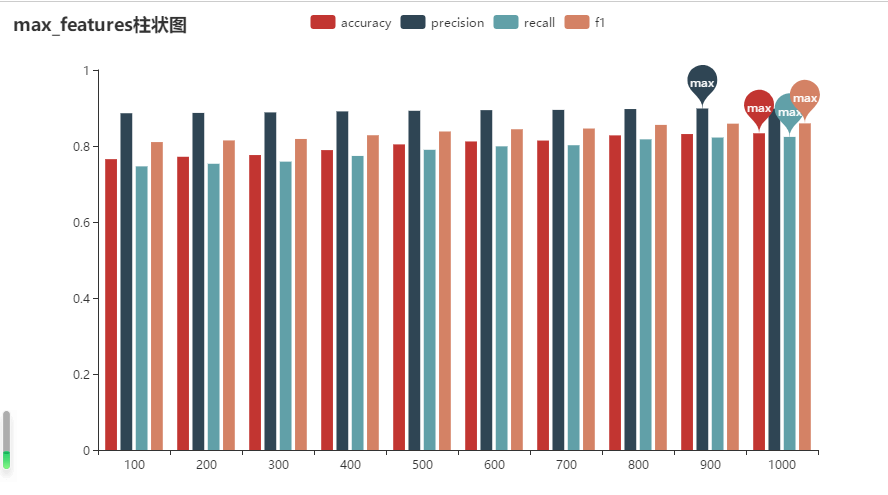

综合指标max_feature为1000时候最好

In [46]:
coef_arr[9]

(0.8334725703146756, 0.8983461409956566, 0.823948517582165, 0.8595404595404595)

In [48]:
vectorizer = TfidfVectorizer(max_features=1000)
X_1000 = vectorizer.fit_transform(cuts)    
y_1000 = pd.Series(new_content['flag']).astype(int)
X_train_1000, X_two_1000, y_train_1000, y_two_1000 = train_test_split(X_1000, y_1000, test_size=0.33, random_state=42)
X_valid_1000, X_test_1000, y_valid_1000, y_test_1000 = train_test_split(X_two_1000, y_two_1000, test_size=0.5, random_state=42)
gnb = GaussianNB()
clf_gnb_1000 = gnb.fit(X_train_1000.toarray(), y_train_1000)
y_valid_predict_gnb_1000 = clf_gnb_1000.predict(X_valid_1000.toarray())

In [49]:
calcul_coef(X_valid_1000, y_valid_1000, y_valid_predict_gnb_1000)

(0.8334725703146756, 0.8983461409956566, 0.823948517582165, 0.8595404595404595)

In [50]:
y_predict_1000 = clf_gnb_1000.predict(X_1000.toarray())

In [51]:
new_content['pred'] = y_predict_1000
new_content.head()

,content,flag,pred
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0,0


In [52]:
copy_news = new_content[(new_content.flag == 0) & (new_content.pred == 1)]
copy_news.head()

,content,flag,pred
24,北京时间6月20日，江苏苏宁足球俱乐部发布了足协杯第四轮江苏苏宁易购队主场对阵河南建业队的官...,0,1
25,当地时间2017年6月17日，土耳其马尼萨省，在土耳其第1步兵训练大队司令部军营，590名土...,0,1
28,中超联赛第13轮比赛已经全部结束，这轮比赛中最让人觉得结果有些出乎意料的，莫过于卡佩罗执教江...,0,1
32,其他规格方面，搭载飞思卡尔IMX6SL处理器，内存512MB，存储8GB，采用定制版系统，低...,0,1
35,北京时间6月20日，据sportando报道，有CBA球队与上赛季效力于西班牙联赛的法国...,0,1


In [53]:
len(copy_news)

549

### random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [58]:
def get_values_by_rf(mf, estimators, max_depth, random_state):
    vectorizer = TfidfVectorizer(max_features=mf)
    X_rf = vectorizer.fit_transform(cuts)    
    y_rf = pd.Series(new_content['flag']).astype(int)
    X_train_rf, X_two_rf, y_train_rf, y_two_rf = train_test_split(X_rf, y_rf, test_size=0.33, random_state=42)
    X_valid_rf, X_test_rf, y_valid_rf, y_test_rf = train_test_split(X_two_rf, y_two_rf, test_size=0.5, random_state=42)    
    clf_rf = RandomForestClassifier(n_estimators=estimators, max_depth=max_depth, random_state=random_state)
    clf_rf.fit(X_train_rf, y_train_rf)
    y_valid_predict_rf = clf_rf.predict(X_valid_rf.toarray())
    return calcul_coef(X_valid_rf, y_valid_rf, y_valid_predict_rf)

In [59]:
get_values_by_rf(1000, 100, 2, 0)

(0.9087301587301587, 1.0, 1.0, 1.0)

#### 参数说明
- n_estimators : integer, optional (default=10)：随机树的个数
也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数，默认是10。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。对Random Forest来说，增加“子模型数”（n_estimators）可以明显降低整体模型的方差，且不会对子模型的偏差和方差有任何影响。模型的准确度会随着“子模型数”的增加而提高，由于减少的是整体模型方差公式的第二项，故准确度的提高有一个上限。在实际应用中，可以以10为单位，考察取值范围在1至201的调参情况。
- max_depth : integer or None, optional (default=None)：树的深度
决策树在建立子树的时候不会限制子树的深度这样建树时，会使每一个叶节点只有一个类别，或是达到min_samples_split。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。
- random_state : int, RandomState instance or None, optional (default=None)

#### 调整max_depth

In [68]:
values_depth_arr = []
for (i, v) in enumerate(range(10,110,10)):
    values_depth_arr.append(get_values_by_rf(100, 100, v, 0))
    print(v)

10
20
30
40
50
60
70
80
90
100


In [73]:
def bar_rf_depth() -> Bar:
    c = (
        Bar()
        .add_xaxis([str(i) for i in range(10, 110, 10)])
        .add_yaxis("accuracy", [v[0] for v in values_depth_arr])        
        .add_yaxis("precision", [v[1] for v in values_depth_arr])       
        .add_yaxis("recall", [v[2] for v in values_depth_arr])       
        .add_yaxis("f1", [v[3] for v in values_depth_arr])
        .set_global_opts(title_opts=opts.TitleOpts(title="rf max_depth柱状图", subtitle=""))
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值", value="max")
                ],
                label_opts=opts.LabelOpts(position="inside", color="#fff", font_size=8, formatter='max')
            ),
        )
    )
    return c

In [74]:
# bar_rf_depth().render_notebook() # notebook有时候显现不出来，故保存到html里可以双击render_rf_md.html打开,截图如下
bar_rf_depth().render('render_rf_md.html')

'E:\\nlp学习\\nlp_homework\\homework_8\\render_rf_md.html'

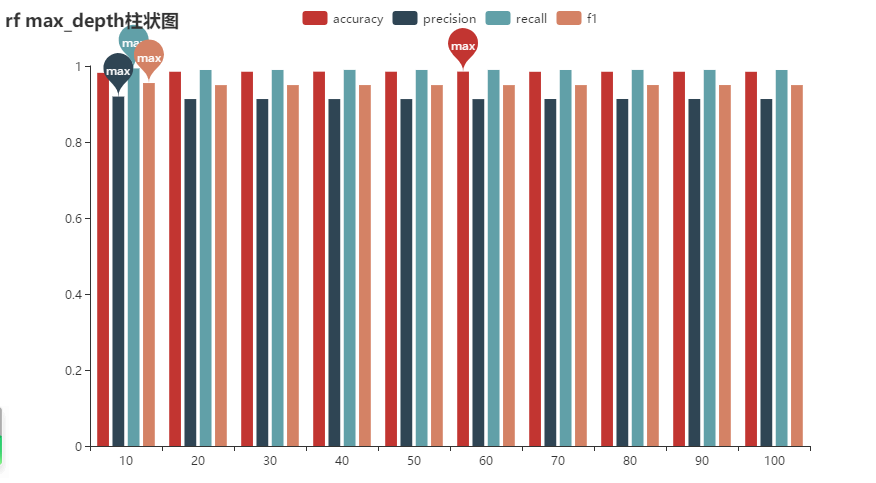

In [75]:
values_depth_arr

[(0.9819688109161794,
  0.9195320808224035,
  0.9936413085114533,
  0.9551513366227263),
 (0.9848927875243665,
  0.9129850851770693,
  0.9895043285068567,
  0.9497058823529412),
 (0.9848927875243665,
  0.9130557715416696,
  0.9895809392476825,
  0.949779411764706),
 (0.9851016429963798,
  0.9130035335689046,
  0.9897341607293343,
  0.9498217108407161),
 (0.9849624060150376,
  0.9129912355103195,
  0.9895809392476825,
  0.9497444946876953),
 (0.9851712614870509,
  0.9128683485266059,
  0.9896575499885084,
  0.9497132774591972),
 (0.9847535505430243,
  0.9131141746200071,
  0.9895043285068567,
  0.9497757188028532),
 (0.9848231690336954,
  0.9131910080588153,
  0.9896575499885084,
  0.9498878635243944),
 (0.9848231690336954,
  0.9131910080588153,
  0.9896575499885084,
  0.9498878635243944),
 (0.9847535505430243,
  0.9131141746200071,
  0.9895043285068567,
  0.9497757188028532)]

各个参数表现相差不大。。。

- KNN
它的思路就是——对于待判断的点，找到离它最近的几个数据点，根据它们的类型决定待判断点的类型。
适用情景：
需要一个特别容易解释的模型的时候。
比如需要向用户解释原因的推荐算法。

- 逻辑回归(LR)
回归方法的核心就是为函数找到最合适的参数，使得函数的值和样本的值最接近。例如线性回归(Linear regression)就是对于函数f(x)=ax+b，找到最合适的a,b。LR拟合的就不是线性函数了，它拟合的是一个概率学中的函数，f(x)的值这时候就反映了样本属于这个类的概率。
适用情景：
LR同样是很多分类算法的基础组件，它的好处是输出值自然地落在0到1之间，并且有概率意义。
因为它本质上是一个线性的分类器，所以处理不好特征之间相关的情况。
模型清晰，背后的概率学经得住推敲。

- SVM(Support vector machine)
SVM的核心思想就是找到不同类别之间的分界面，使得两类样本尽量落在面的两边，而且离分界面尽量远。
最早的SVM是平面的，局限很大。但是利用核函数(kernel function)，我们可以把平面投射(mapping)成曲面，进而大大提高SVM的适用范围。
提高之后的SVM同样被大量使用，在实际分类中展现了很优秀的正确率。

- Naive Bayes
核心思路是根据条件概率计算待判断点的类型。
是相对容易理解的一个模型，至今依然被垃圾邮件过滤器使用。
适用情景：
需要一个比较容易解释，而且不同维度之间相关性较小的模型的时候。
可以高效处理数据，虽然结果可能不尽如人意。

- 决策树/随机森林
随机森林其实算是一种集成算法。它首先随机选取不同的特征(feature)和训练样本(training sample)，生成大量的决策树，然后综合这些决策树的结果来进行最终的分类。
不需要特别调参就能效果比较好。

### k-means

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
y_train_km_pred = []

In [106]:
vectorizer = TfidfVectorizer(max_features=500)
X_km = vectorizer.fit_transform(cuts)    
y_km = pd.Series(new_content['flag']).astype(int)
X_train_km, X_two_km, y_train_km, y_two_km = train_test_split(X_km, y_km, test_size=0.33, random_state=42)
X_valid_km, X_test_km, y_valid_km, y_test_km = train_test_split(X_two_km, y_two_km, test_size=0.5, random_state=42)  
print('模型拆分完毕')

模型拆分完毕


In [120]:
clf_km = KMeans(n_clusters=2, max_iter=7000).fit(X_train_km.toarray(), y_train_km)
y_train_km_pred = clf_km.predict(X_train_km.toarray())
y_valid_km_pred = clf_km.predict(X_valid_km.toarray())
calcul_coef(X_valid_km, y_valid_km, y_valid_km_pred)

(0.5445558340295182, 1.0, 0.5992492147399066, 0.7494131736526946)